<a href="https://colab.research.google.com/github/AP2324/trabajo-equipo-9/blob/main/00_data_owner_upload_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas


In [ ]:
#! /workspace/.pyenv_mirror/fakeroot/versions/3.9.0/bin/python3.9 -m pip install --upgrade pip

#pip install gevent==23.9.1
#pip install pyzmq==25.1.1
#print(f"{sy.__version__ = }")

In [ ]:
# Esta línea de código instala una versión específica de la biblioteca 'syft', que es la versión 0.8.3.
# Se utiliza 'syft' para realizar computación segura y privada, lo que es esencial en escenarios de aprendizaje federado o privacidad de datos.
# El comando '%pip install' es un comando mágico de Jupyter que facilita la instalación de paquetes de Python directamente desde el cuaderno.Es importante asegurarse de que todos los requisitos y dependencias, como 'syft', estén correctamente instalados para el correcto funcionamiento de los ejemplos y código en este cuaderno.
%pip install "syft==0.8.3" -q


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importa NumPy para operaciones matemáticas y manejo de arrays
import numpy as np

# Importa Pyplot de Matplotlib para gráficos y visualizaciones
import matplotlib.pyplot as plt

# Importa Syft para computación segura y aprendizaje federado
import syft as sy

# Carga el conjunto de datos MNIST, tanto en formato procesado como en bruto
from mnist_dataset import mnist, mnist_raw


## 1. Lanzar el dominio y subir los datos

In [ ]:
# Primero, necesitamos lanzar un nuevo nodo en PySyft. Un nodo actúa como un servidor o un contenedor para nuestros datos y cálculos.
# Aquí, creamos un nodo llamado 'mnist-domain'.
# El argumento 'dev_mode=True' indica que estamos en modo de desarrollo, lo cual es útil para la depuración y el desarrollo rápido.
# 'reset=False' significa que no queremos reiniciar el estado del nodo; es decir, si ya existen datos o configuraciones, los mantendremos.
node = sy.orchestra.launch(name="mnist-domain", dev_mode=True, reset=False)

# Una vez que el nodo está en marcha, necesitamos acceder a él. Para eso, utilizamos la función 'login'.
# Aquí, 'email' y 'password' son las credenciales para autenticarse en el nodo. En este caso, estamos utilizando credenciales de ejemplo.
# Al iniciar sesión exitosamente, obtenemos un 'root_client', que es nuestro punto de acceso para interactuar con el nodo.
root_client = node.login(email="info@openmined.org", password="changethis")


Staging Protocol Changes...
Data Migrated to latest version !!!
Logged into <mnist-domain: High side Domain> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].me.set_password([new_password])`.

### Cargar el conjunto de datos MNIST.

Vamos a trabajar con el conjunto de datos MNIST, un recurso fundamental en el mundo del aprendizaje automático para la clasificación de imágenes. MNIST consta de imágenes de dígitos manuscritos del 0 al 9, junto con etiquetas que indican el número que representa cada imagen. Este conjunto de datos es ampliamente utilizado para entrenar y probar modelos de aprendizaje automático en tareas de reconocimiento de dígitos.

Comenzaremos por cargar el conjunto de datos en su forma 'cruda' para familiarizarnos con su estructura y contenido. Este paso inicial es crucial para comprender cómo preparar los datos para el entrenamiento de modelos.

Let's load the raw MNIST images and show with the `mnist_raw` function from [`mnist_datasets.py`](./datasets.py)

Carguemos las imágenes sin procesar de MNIST y mostremos con la función mnist_raw de mnist_datasets.py

In [ ]:
# Cargar el conjunto de datos MNIST 'crudo'
# Usamos la función 'mnist_raw()' para obtener los datos directamente en su formato original.
# 'train_images' almacenará las imágenes de entrenamiento, que son matrices de píxeles representando los dígitos manuscritos.
# 'train_labels' contendrá las etiquetas correspondientes a cada imagen, indicando el dígito real que representa la imagen (de 0 a 9).
# Los dos últimos '_' son usados para ignorar los conjuntos de datos de prueba que 'mnist_raw()' también puede retornar, ya que por ahora nos enfocaremos solo en los datos de entrenamiento.
train_images, train_labels, _, _ = mnist_raw()


Una vez que hemos cargado los datos MNIST, es útil visualizar las imágenes y comprender la estructura de los arrays que contienen las imágenes y las etiquetas. Esto nos dará una mejor idea de cómo se ven los datos con los que estamos trabajando y cómo están organizados.

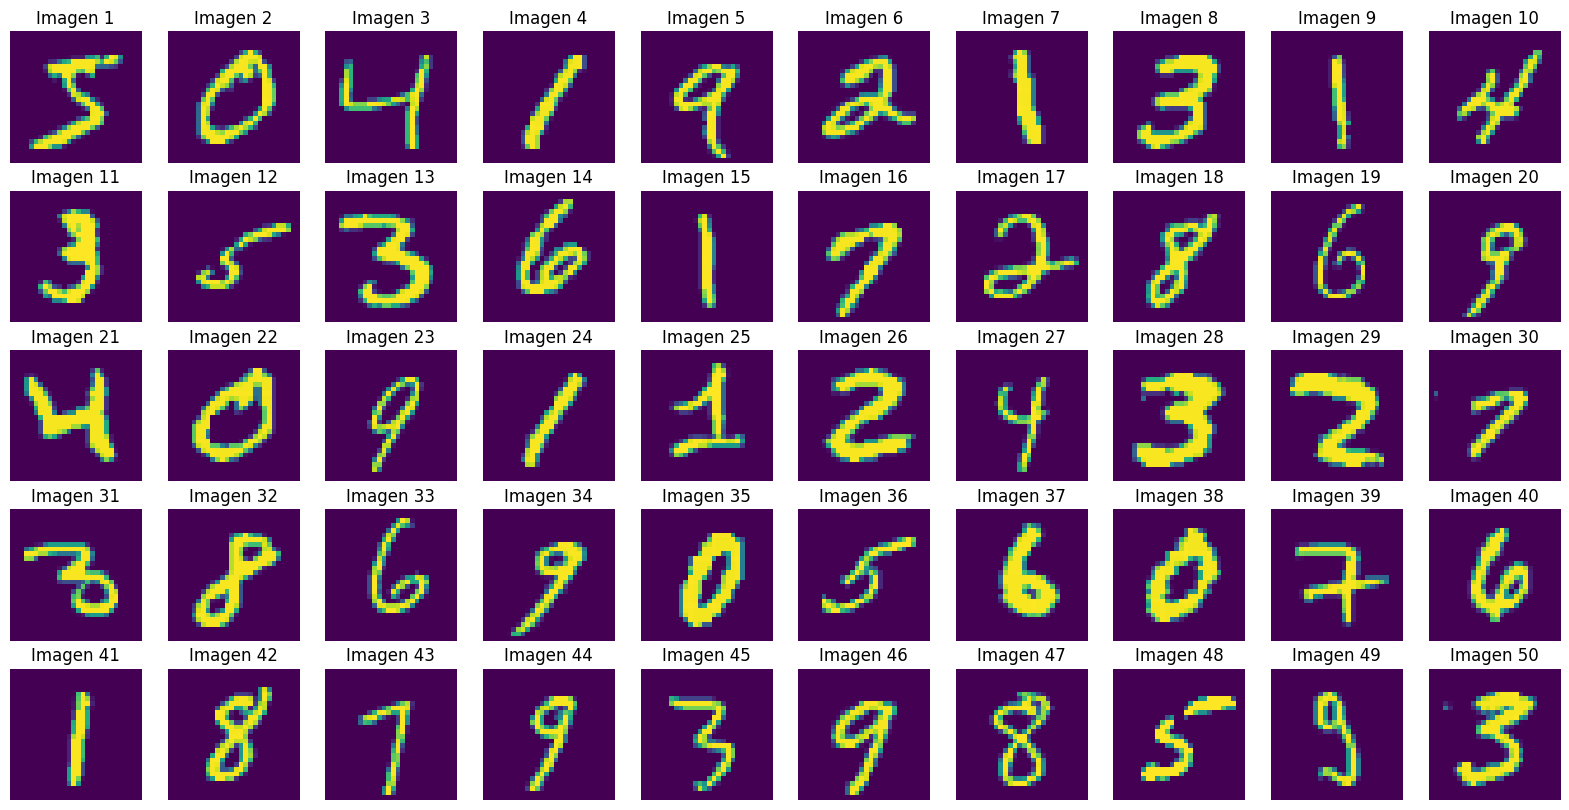

In [ ]:
# Visualizar las primeras imagen del conjunto de entrenamiento
# Definir el tamaño de la cuadrícula
num_filas = 5
num_columnas = 10
num_imagenes = num_filas * num_columnas

# Crear una figura con subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 10))

# Iterar sobre las imágenes y mostrarlas en los subplots
for i in range(num_imagenes):
    fila = i // num_columnas
    columna = i % num_columnas
    axs[fila, columna].imshow(train_images[i])
    axs[fila, columna].axis('off')  # Desactivar los ejes
    axs[fila, columna].set_title(f'Imagen {i+1}')  # Añadir un título con el número de imagen

plt.show()


In [ ]:
# Visualizar la primera imagen del conjunto de entrenamiento
# Usamos 'plt.imshow' de Matplotlib para mostrar la imagen.
# 'train_images[0]' selecciona la primera imagen del conjunto de datos.
#plt.imshow(train_images[0])



In [ ]:
# Mostrar la etiqueta correspondiente a la primera imagen
# 'train_labels[i]' nos da la etiqueta de la primeras 50 imagenes, que indica el dígito representado.
for i in range(50):
    print(f"Etiqueta de la imagen {i+1}: {train_labels[i]}")


Etiqueta de la imagen 1: 5
Etiqueta de la imagen 2: 0
Etiqueta de la imagen 3: 4
Etiqueta de la imagen 4: 1
Etiqueta de la imagen 5: 9
Etiqueta de la imagen 6: 2
Etiqueta de la imagen 7: 1
Etiqueta de la imagen 8: 3
Etiqueta de la imagen 9: 1
Etiqueta de la imagen 10: 4
Etiqueta de la imagen 11: 3
Etiqueta de la imagen 12: 5
Etiqueta de la imagen 13: 3
Etiqueta de la imagen 14: 6
Etiqueta de la imagen 15: 1
Etiqueta de la imagen 16: 7
Etiqueta de la imagen 17: 2
Etiqueta de la imagen 18: 8
Etiqueta de la imagen 19: 6
Etiqueta de la imagen 20: 9
Etiqueta de la imagen 21: 4
Etiqueta de la imagen 22: 0
Etiqueta de la imagen 23: 9
Etiqueta de la imagen 24: 1
Etiqueta de la imagen 25: 1
Etiqueta de la imagen 26: 2
Etiqueta de la imagen 27: 4
Etiqueta de la imagen 28: 3
Etiqueta de la imagen 29: 2
Etiqueta de la imagen 30: 7
Etiqueta de la imagen 31: 3
Etiqueta de la imagen 32: 8
Etiqueta de la imagen 33: 6
Etiqueta de la imagen 34: 9
Etiqueta de la imagen 35: 0
Etiqueta de la imagen 36: 5
E

In [ ]:
# Mostrar la etiqueta correspondiente a la primera imagen
# 'train_labels[0]' nos da la etiqueta de la primera imagen, que indica el dígito representado.
# print(train_labels[0])


Imprimir las dimensiones de los arrays de imágenes y etiquetas, nos ayuda a entender el tamaño del conjunto de datos con el que estamos trabajando.

In [ ]:
# 'train_images.shape' nos muestra las dimensiones del array de imágenes, indicando el número de imágenes y el tamaño de cada imagen.
# 'train_labels.shape' nos muestra la longitud del array de etiquetas, que debería coincidir con el número de imágenes.
print(f"{train_images.shape = }")
print(f"{train_labels.shape = }")

train_images.shape = (60000, 28, 28)
train_labels.shape = (60000,)


### Processing: Flattening the MNIST images and apply one-hot encoding on the labels

In [ ]:
# Cargar y procesar el conjunto de datos MNIST
# Esta vez, la función 'mnist()' devuelve los datos ya procesados, con las imágenes aplanadas y las etiquetas codificadas en one-hot.
train_images, train_labels, _, _ = mnist()


### Get a subset of MNIST

In [ ]:
# Seleccionar un subconjunto de los datos MNIST para trabajar
# Esto es útil para experimentar rápidamente o cuando se trabaja con recursos limitados.
num_samples = 1000  # Número de muestras que queremos usar
train_images = train_images[:num_samples, :]  # Seleccionamos las primeras 'num_samples' imágenes
train_labels = train_labels[:num_samples, :]  # Seleccionamos las primeras 'num_samples' etiquetas

In [ ]:
# Imprimir las dimensiones del subconjunto de datos para verificar
print(f"{train_images.shape = }")  # Debería mostrar (1000, 784), indicando 1000 imágenes aplanadas de 784 píxeles cada una
print(f"{train_labels.shape = }")  # Debería mostrar (1000, 10), indicando 1000 etiquetas codificadas en one-hot



train_images.shape = (1000, 784)
train_labels.shape = (1000, 10)


Las imágenes de entrenamiento y las etiquetas de entrenamiento son datos privados. Vamos a crear datos ficticios similares con la misma forma que los datos privados. Esto es útil para simular y desarrollar modelos sin acceder a datos reales y sensibles.

In [ ]:
# Imágenes ficticias con valores aleatorios
mock_images = np.random.rand(num_samples, 784)
mock_images.shape


(1000, 784)

**mock_images** crea un arreglo de imágenes ficticias usando la función np.random.rand, que genera números aleatorios en el rango [0, 1). El arreglo tiene una forma de (num_samples, 784), donde num_samples representa el número de imágenes ficticias que quieres crear y 784 es la cantidad de píxeles por imagen (basado en la transformación de imágenes MNIST de 28x28 a vectores 1D de 784 elementos). Estos valores aleatorios simulan las imágenes reales en términos de estructura, pero sin contener información real.

In [ ]:
# Etiquetas ficticias codificadas en one-hot
mock_labels = np.eye(10)[np.random.choice(10, num_samples)]
mock_labels.shape

(1000, 10)

**mock_labels** crea etiquetas ficticias en formato one-hot. Primero, np.eye(10) genera una matriz identidad de 10x10, donde cada fila representa una etiqueta one-hot para los dígitos del 0 al 9. Luego, np.random.choice(10, num_samples) selecciona aleatoriamente num_samples veces un número entre 0 y 9, simulando la elección aleatoria de etiquetas. Al indexar la matriz identidad con estos números aleatorios, se obtienen etiquetas one-hot aleatorias que simulan las etiquetas reales de las imágenes.

### Verificación  de la estructura de los datos ficticios

La siguiente instruccion verifica que las dimensiones de las etiquetas ficticias (mock_labels) y las imagenes ficticias (mock_images) coincidan con las dimensiones de las etiquetas reales del conjunto de entrenamiento (train_labels) y (train_images). Esto con el fin de asegurarse de que los datos ficticios se puedan utilzar en lugar de los datos reales sin modificar la estructura esperada por el modelo.

In [ ]:
# Verificaciones para asegurar que los datos ficticios tienen la misma forma que los datos reales

assert mock_labels.shape == train_labels.shape, "Las formas de las etiquetas no coinciden"
print("La verificación de la forma de las etiquetas ha pasado exitosamente.")

assert mock_images.shape == train_images.shape, "Las formas de las imágenes no coinciden"
print("La verificación de la forma de las imágenes ha pasado exitosamente.")
# Si alguna de las aserciones falla, se lanzará un AssertionError y se mostrará el mensaje correspondiente, deteniendo la ejecución del programa
# antes de llegar a la instrucción print.

La verificación de la forma de las etiquetas ha pasado exitosamente.
La verificación de la forma de las imágenes ha pasado exitosamente.


### El DO (Data Owner - Propietario de datos) carga los datos

El DO tiene un papel crucial en asegurar que los datos estén disponibles de forma segura para el entrenamiento de modelos sin comprometer la privacidad. Este proceso implica varios pasos detallados a continuación:

In [ ]:
# Crear un nuevo conjunto de datos en PySyft, especificando su nombre, descripción y una URL de referencia.
dataset = sy.Dataset(
    name="MNIST data",
    description="Contains the flattened training images and one-hot encoded training labels.",
    url="https://storage.googleapis.com/cvdf-datasets/mnist/"
)

# Añadir un colaborador al conjunto de datos. En este caso, 'Alice' es la ingeniera de datos responsable de la carga.
dataset.add_contributor(role=sy.roles.UPLOADER,
                        name="Alice",
                        email="alice@openmined.com",
                        note="Alice is the data engineer at the OpenMined")

dataset.contributors

{syft.service.dataset.dataset.Contributor}

In [ ]:
# Crear activos para el conjunto de datos. Un activo puede ser cualquier cosa, desde imágenes de entrenamiento hasta modelos.
# Aquí, creamos dos activos: uno para las imágenes de entrenamiento y otro para las etiquetas.
asset_mnist_train_input = sy.Asset(
    name="MNIST training images",
    description="The training images of the MNIST dataset",
    data=train_images,  # Datos reales
    mock=mock_images    # Datos ficticios para simular un entorno de datos privados
)

asset_mnist_train_labels = sy.Asset(
    name="MNIST training labels",
    description="The training labels of MNIST dataset",
    data=train_labels,  # Datos reales
    mock=mock_labels    # Datos ficticios
)

# Añadir los activos creados al conjunto de datos.
dataset.add_asset(asset_mnist_train_input)
dataset.add_asset(asset_mnist_train_labels)

# Finalmente, el DO carga el conjunto de datos al sistema para que esté disponible para el entrenamiento.
root_client.upload_dataset(dataset)

  0%|          | 0/2 [00:00<?, ?it/s]

Uploading: MNIST training images


 50%|█████     | 1/2 [00:00<00:00,  1.52it/s]

Uploading: MNIST training labels


100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


SyftSuccess: Dataset uploaded to 'mnist-domain'. To see the datasets uploaded by a client on this node, use command `[your_client].datasets`

### El DO inspecciona los datos cargados.

Una vez que los datos están cargados, el DO puede inspeccionar los conjuntos de datos disponibles y crear una cuenta para el DS, permitiendo así la colaboración segura.

In [ ]:
# Inspeccionar los conjuntos de datos cargados para verificar que se han subido correctamente.
datasets = root_client.api.services.dataset.get_all()
assert len(datasets) == 1  # Asegurarse de que hay un conjunto de datos cargado
datasets


DictTuple(syft.service.dataset.dataset.Dataset,)

#### The first asset of the dataset contains the training and mock images

In [ ]:
# Verificar los activos dentro del conjunto de datos.
# El primer activo debe contener las imágenes de entrenamiento y los datos ficticios.
# El segundo activo debe contener las etiquetas de entrenamiento y los datos ficticios.
datasets[0].assets[0]  # Imágenes
datasets[0].assets[1]  # Etiquetas

syft.service.dataset.dataset.Asset

MNIST training labels: Esta es una descripción del activo que indica que contiene las etiquetas de entrenamiento del conjunto de datos MNIST.

syft.service.dataset.dataset.MarkdownDescription: Esta es la descripción en formato Markdown del activo. Proporciona información adicional y metadatos sobre el activo.

Asset ID: Identificador único del activo dentro del sistema.

Action Object ID: Identificador único del objeto de acción asociado con el activo.

Uploaded by: Indica quién subió este activo al sistema, en este caso, "Jane Doe" con la dirección de correo electrónico info@openmined.org.

Created on: Fecha y hora en que se creó el activo.

Data: Contiene los datos reales del activo, que en este caso son las etiquetas de entrenamiento del MNIST.

Mock Data: Contiene datos ficticios relacionados con el activo. En este caso, también son etiquetas de entrenamiento del MNIST, pero probablemente se hayan generado artificialmente para simular datos de entrenamiento adicionales o para realizar pruebas.

### El DO crea una cuenta para el Científico de Datos (DS).

In [ ]:
# Crear una cuenta para el DS, proporcionando detalles como el nombre, el email y la institución.
register_result = root_client.register(
    name="Sheldon Cooper",
    email="sheldon17@caltech.edu",#agre un 17
    password="changethis",
    password_verify="changethis",
    institution="Caltech",
    website="https://www.caltech.edu/"
)


In [ ]:
assert isinstance(register_result, sy.SyftSuccess)  # Verificar que la creación de la cuenta fue exitosa


### 📓 Now switch to the [first DS's notebook](./01-data-scientist-submit-code.ipynb)